# **BDM-3035 Big Data Capstone Project**
Instructor: Meysam Effati

Members:


*   Ann Margaret Silva (C0903604)
*   Antonio Carlos De Mello Mendes (C0866063)

*   Maria Jessa Cruz (C0910329)
*   Prescila Mora (C0896891)


*   Rewant Sharma (C0894265)



Datasets:

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi*

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp*


# **Wildfire Prediction Data**

each column name in the GeoDataFrame based on the information provided:

**_id:** Unique identifier for each record in the dataset.

**lat:** Latitude of the fire location.

**lon:** Longitude of the fire location.

**rep_date:** The reported date of the fire.

**source:** Source of the data for the fire event.

**sensor:** The type of sensor used to detect the fire.

**satellite:** The name of the satellite that detected the fire.

**agency:** The agency reporting the fire, such as provincial, territorial, or Parks Canada.

**temp:** Temperature at the fire location.

**rh:** Relative humidity at the fire location.

**ws:** Wind speed at the fire location.

**wd:** Wind direction at the fire location.

**pcp:** Precipitation at the fire location.

**ffmc:** Fine Fuel Moisture Code, part of the Canadian Forest Fire Weather Index (FWI) System, indicating the moisture content of surface litter and other cured fine fuels.

**dmc:** Duff Moisture Code, part of the FWI System, representing the average moisture content of loosely compacted organic layers of moderate depth.

**dc:** Drought Code, part of the FWI System, indicating the moisture content of deep, compact organic layers.

**isi:** Initial Spread Index, part of the FWI System, indicating the rate of spread based on the FFMC and wind speed.

**bui:** Buildup Index, part of the FWI System, combining the DMC and DC to indicate the total amount of fuel available for combustion.

**fwi**: Fire Weather Index, a comprehensive rating of fire intensity.
**fuel:** Type of fuel present at the fire location.

**ros:** Rate of spread of the fire.

**sfc:** Surface fuel consumption, representing the amount of fuel consumed at the surface level.

**tfc**: Total fuel consumption, representing the total amount of fuel consumed during the fire.

**bfc**: Below-ground fuel consumption, representing the amount of fuel consumed below ground level.

**hfi**: Head fire intensity, indicating the intensity of the leading edge of the fire.

**cfb**: Crown fraction burned, indicating the proportion of the crown area burned.

**pcuring**: Percent curing, indicating the proportion of dead material in grass fuels.

**greenup**: The state of vegetation green-up, indicating how much the vegetation has recovered or greened up.

**elev**: Elevation of the fire location.

**sfl**: Surface fireline intensity, indicating the intensity of the fire along the surface.

**cfl**: Crown fireline intensity, indicating the intensity of the fire in the crown of trees.

**tfc0**: Initial total fuel consumption, representing the amount of fuel initially consumed during the fire.

**ecozone**: Ecozone of the fire location, providing information about the ecological zone.

**sfc0**: Initial surface fuel consumption, representing the initial amount of surface fuel consumed.

**cbh**: Canopy base height, indicating the height above ground level where the canopy begins.

These columns represent various attributes related to fire incidents, fire weather, fuel conditions, and fire behavior as collected by Canadian fire management agencies and other sources.

### Feature Engineering ###

Handling Missing Values

In [73]:
import sys
import os
import re
from dotenv import load_dotenv
import pandas as pd
import geopandas as gpd
import numpy as np
import geopandas as gpd
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('scripts')))

In [76]:
# Import the db_utils functions
import extract_to_mongodb as etm
import db_utils as dbu

In [77]:
# Define the collection name
collection_name = 'wildFire_Collection_clean_Address'

In [78]:
# Load the data from MongoDB
gdf = dbu.load_data_from_mongodb(collection_name)

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


In [79]:
# Display the first few rows of the GeoDataFrame
print("First few rows of the loaded GeoDataFrame:")
print(gdf.head())

First few rows of the loaded GeoDataFrame:
                        _id        lat         lon    rep_date source  \
0  666a3c628ccb08eec3af76dc  67.228996 -138.828995  2021-07-20   USFS   
1  666a3c628ccb08eec3af76dd  66.803001 -137.238998  2021-07-20   USFS   
2  6669e2f444a41007063cc7e4  49.826000 -107.129000  2020-04-25   NASA   
3  666a1b048ccb08eec3aec561  51.477001  -94.732002  2021-07-12   USFS   
4  666a1b048ccb08eec3aec562  52.009670  -93.233368  2021-07-12  NASA2   

    sensor satellite agency       temp  rh  ...  tfc0  ecozone  sfc0  \
0    MODIS      Aqua     YT  25.218000  28  ...  2.40       11  2.20   
1    MODIS      Aqua     YT  25.049999  32  ...  2.24       11  1.49   
2    MODIS      Aqua     SK  14.874000  24  ...  0.35       10  0.35   
3  VIIRS-I     S-NPP     ON  29.694000  39  ...  4.68       6a  3.89   
4  VIIRS-I     S-NPP     ON  30.134001  37  ...  2.05       6a  1.44   

                     geometry  country  municipality  postalCode  \
0     POINT (-138

In [80]:
# Check the shape of the GeoDataFrame
print("\nShape of the GeoDataFrame:")
print(gdf.shape)


Shape of the GeoDataFrame:
(206765, 41)


In [81]:
# Check for missing values
missing_values = gdf.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
_id                       0
lat                       0
lon                       0
rep_date                  0
source                    0
sensor                    0
satellite               211
agency                    0
temp                      0
rh                        0
ws                        0
wd                        0
pcp                       0
ffmc                      0
dmc                       0
dc                        0
isi                       0
bui                       0
fwi                       0
fuel                      0
ros                       0
sfc                       0
tfc                       0
bfc                  101679
hfi                       0
cfb                       0
pcuring               22323
greenup               22323
elev                      0
sfl                       0
cfl                       0
tfc0                      0
ecozone                  33
sfc0                      0
geometry         

In [82]:
# Identify columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
satellite        211
bfc           101679
pcuring        22323
greenup        22323
ecozone           33
postalCode    108224
dtype: int64


In [83]:
# Check for rows with any missing values
rows_with_missing_values = gdf.isnull().any(axis=1)
num_rows_with_missing_values = rows_with_missing_values.sum()
print(f"\nNumber of rows with missing values: {num_rows_with_missing_values}")


Number of rows with missing values: 151942


In [84]:
# Show the details of rows with missing values
print("\nDetails of rows with missing values:")
print(gdf[rows_with_missing_values])


Details of rows with missing values:
                             _id        lat         lon    rep_date source  \
0       666a3c628ccb08eec3af76dc  67.228996 -138.828995  2021-07-20   USFS   
1       666a3c628ccb08eec3af76dd  66.803001 -137.238998  2021-07-20   USFS   
3       666a1b048ccb08eec3aec561  51.477001  -94.732002  2021-07-12   USFS   
5       666a1b048ccb08eec3aec564  51.382000  -94.242996  2021-07-12   USFS   
6       666a3c628ccb08eec3af76de  64.093002 -133.016998  2021-07-20   USFS   
...                          ...        ...         ...         ...    ...   
206760  6670cecea6dc531d5ed0dda4  58.470390 -114.456284  2023-05-04  NASA2   
206761  6670cecea6dc531d5ed0dda5  58.471321 -114.463013  2023-05-04  NASA2   
206762  6670cecfa6dc531d5ed0dda6  58.474621 -114.461357  2023-05-04  NASA2   
206763  6670cecfa6dc531d5ed0dda7  58.475540 -114.468071  2023-05-04  NASA2   
206764  6670cf23a6dc531d5ed0df0d  56.296711 -111.106720  2023-01-20  NASA2   

         sensor satellite

In [85]:
# Show details of the rows with missing values for each column
for column in columns_with_missing_values.index:
    print(f"\nDetails of missing values in column '{column}':")
    missing_details = gdf[gdf[column].isnull()]
    print(missing_details)


Details of missing values in column 'satellite':
                             _id        lat         lon    rep_date source  \
51049   666a6743a1f73f51bed3abbf  65.193016 -119.207169  2022-07-05   NOAA   
51089   666a6745a1f73f51bed3abc8  65.173210 -119.152298  2022-07-05   NOAA   
51109   666a6745a1f73f51bed3abcc  65.180794 -119.161316  2022-07-05   NOAA   
51111   666a6746a1f73f51bed3abce  63.759419 -121.289146  2022-07-05   NOAA   
51115   666a6746a1f73f51bed3abd1  63.652706 -114.923599  2022-07-05   NOAA   
...                          ...        ...         ...         ...    ...   
199724  666a8daca1f73f51bed48169  65.198738 -119.024559  2022-07-05   NOAA   
199766  666a8db5a1f73f51bed48198  66.565506 -138.994339  2022-07-05   NOAA   
199900  666a8dcea1f73f51bed48225  66.570412 -139.018448  2022-07-05   NOAA   
200106  666a8df5a1f73f51bed482fd  66.575333 -139.042664  2022-07-05   NOAA   
200302  666a8e20a1f73f51bed483ed  66.678398 -139.501953  2022-07-05   NOAA   

       sensor

In [86]:
# Convert rep_date to datetime
gdf['rep_date'] = pd.to_datetime(gdf['rep_date'])

In [87]:
gdf['rep_date']

0        2021-07-20
1        2021-07-20
2        2020-04-25
3        2021-07-12
4        2021-07-12
            ...    
206760   2023-05-04
206761   2023-05-04
206762   2023-05-04
206763   2023-05-04
206764   2023-01-20
Name: rep_date, Length: 206765, dtype: datetime64[ns]

In [88]:
# List of unique localities
localities = gdf['locality'].unique()
localities

array(['Old Crow', 'Glenbain', 'Pikangikum', ..., 'Kahnawake', 'Hastings',
       'Dolbeau-Mistassini'], dtype=object)

In [89]:
# Check for missing values in the 'locality' column
missing_locality = gdf[gdf['locality'].isnull()]
missing_locality

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,tfc0,ecozone,sfc0,geometry,country,municipality,postalCode,freeformAddress,addressComponents,locality


In [90]:
#  Check the range of missing values in the locality data

def missing_date_ranges(gdf, locality_col='locality', date_col='rep_date'):
    missing_date_info = {}
    localities = gdf[locality_col].unique()

    for locality in localities:
        locality_data = gdf[gdf[locality_col] == locality]
        all_dates = pd.date_range(start=locality_data[date_col].min(), end=locality_data[date_col].max())
        existing_dates = pd.to_datetime(locality_data[date_col])
        missing_dates = all_dates.difference(existing_dates)
        
        missing_ranges = []
        if not missing_dates.empty:
            start_date = missing_dates[0]
            missing_dates = list(missing_dates)  # Convert to list for indexing
            for i in range(1, len(missing_dates)):
                if missing_dates[i] != missing_dates[i-1] + pd.Timedelta(days=1):
                    end_date = missing_dates[i-1]
                    missing_ranges.append((start_date, end_date))
                    start_date = missing_dates[i]
            missing_ranges.append((start_date, missing_dates[-1]))
        missing_date_info[locality] = missing_ranges

    return missing_date_info

missing_date_info = missing_date_ranges(gdf)

for locality, ranges in missing_date_info.items():
    print(f"Missing date ranges for locality '{locality}':")
    for start, end in ranges:
        print(f"  From {start.date()} to {end.date()}")

Missing date ranges for locality 'Old Crow':
  From 2020-06-04 to 2020-06-11
  From 2020-06-17 to 2020-06-28
  From 2020-06-30 to 2020-08-07
  From 2020-08-09 to 2021-06-17
  From 2021-06-19 to 2021-06-22
  From 2021-07-07 to 2021-07-09
  From 2021-07-14 to 2021-07-19
  From 2021-07-22 to 2021-07-22
  From 2021-07-24 to 2022-07-03
Missing date ranges for locality 'Glenbain':
  From 2020-04-26 to 2021-04-22
Missing date ranges for locality 'Pikangikum':
  From 2020-06-04 to 2020-07-03
  From 2020-07-05 to 2021-06-16
  From 2021-06-18 to 2021-06-24
  From 2021-06-26 to 2021-06-26
  From 2021-06-29 to 2021-06-29
  From 2021-07-31 to 2022-05-16
  From 2022-05-18 to 2022-08-23
Missing date ranges for locality 'Faro':
  From 2020-05-25 to 2021-06-18
  From 2021-06-21 to 2021-07-01
  From 2021-07-04 to 2021-07-04
  From 2021-07-06 to 2021-07-18
  From 2021-07-23 to 2021-07-30
  From 2021-08-01 to 2022-05-31
  From 2022-06-02 to 2022-06-03
  From 2022-06-05 to 2022-06-18
  From 2022-06-20 to 2

In [91]:
# Group by locality and sort by date in ascending order
gdf = gdf.sort_values(by=['locality', 'rep_date'])

Perform forward fill and backward fill for categorical or stable features and interpolation for continuous features

In [92]:
# Handle missing values for 'satellite' column using forward fill (ffill) followed by backward fill (bfill)
gdf['satellite'].fillna(method='ffill', inplace=True)
gdf['satellite'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1694/2175339512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['satellite'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/2175339512.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdf['satellite'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/2175339512.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

In [93]:
# Handle missing values for 'bfc' (Below-ground fuel consumption) using forward fill (ffill) followed by backward fill (bfill)
gdf['bfc'].fillna(method='ffill', inplace=True)
gdf['bfc'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1694/3190217280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['bfc'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/3190217280.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdf['bfc'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/3190217280.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior w

In [94]:
# Handle missing values for 'pcuring' (Percent curing) using forward fill (ffill) followed by backward fill (bfill)
gdf['pcuring'].fillna(method='ffill', inplace=True)
gdf['pcuring'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1694/1791024222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['pcuring'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/1791024222.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdf['pcuring'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/1791024222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The be

In [95]:
# Handle missing values for 'greenup' using forward fill (ffill) followed by backward fill (bfill)
gdf['greenup'].fillna(method='ffill', inplace=True)
gdf['greenup'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1694/4092820885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['greenup'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/4092820885.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdf['greenup'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/4092820885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The be

In [96]:
# Handle missing values for 'ecozone' using forward fill (ffill) followed by backward fill (bfill)
gdf['ecozone'].fillna(method='ffill', inplace=True)
gdf['ecozone'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1694/3441584968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['ecozone'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/3441584968.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdf['ecozone'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1694/3441584968.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  g

In [97]:
# Fill missing postal codes with 'Unknown'
gdf['postalCode'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1694/1962408253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['postalCode'].fillna('Unknown', inplace=True)


In [98]:
# Verify remaining missing values
remaining_missing = gdf.isnull().sum()
print("Remaining missing values:")
print(remaining_missing)

Remaining missing values:
_id                  0
lat                  0
lon                  0
rep_date             0
source               0
sensor               0
satellite            0
agency               0
temp                 0
rh                   0
ws                   0
wd                   0
pcp                  0
ffmc                 0
dmc                  0
dc                   0
isi                  0
bui                  0
fwi                  0
fuel                 0
ros                  0
sfc                  0
tfc                  0
bfc                  0
hfi                  0
cfb                  0
pcuring              0
greenup              0
elev                 0
sfl                  0
cfl                  0
tfc0                 0
ecozone              0
sfc0                 0
geometry             0
country              0
municipality         0
postalCode           0
freeformAddress      0
addressComponents    0
locality             0
dtype: int64


In [99]:
missing_values_after_fill = gdf.isnull().sum()
missing_values_after_fill

_id                  0
lat                  0
lon                  0
rep_date             0
source               0
sensor               0
satellite            0
agency               0
temp                 0
rh                   0
ws                   0
wd                   0
pcp                  0
ffmc                 0
dmc                  0
dc                   0
isi                  0
bui                  0
fwi                  0
fuel                 0
ros                  0
sfc                  0
tfc                  0
bfc                  0
hfi                  0
cfb                  0
pcuring              0
greenup              0
elev                 0
sfl                  0
cfl                  0
tfc0                 0
ecozone              0
sfc0                 0
geometry             0
country              0
municipality         0
postalCode           0
freeformAddress      0
addressComponents    0
locality             0
dtype: int64

Aggregate Daily Records

In [100]:
# Check the number of records per day for each locality
record_counts = gdf.groupby(['locality', 'rep_date']).size().reset_index(name='counts')

In [101]:
record_counts

,locality,rep_date,counts
0,100 Mile House,2021-01-09,1
1,100 Mile House,2021-07-01,1
2,100 Mile House,2021-07-21,1
3,100 Mile House,2021-07-25,1
4,100 Mile House,2021-07-28,3
...,...,...,...
9755,Zhoda,2020-07-16,5
9756,Zhoda,2020-08-06,10
9757,Zhoda,2020-08-07,25
9758,Zhoda,2020-08-11,1


In [102]:
# Filter to show only those with more than one record per day
multiple_records_per_day = record_counts[record_counts['counts'] > 1]

In [103]:
print("Localities with multiple records per day:")
print(multiple_records_per_day)

Localities with multiple records per day:
            locality   rep_date  counts
4     100 Mile House 2021-07-28       3
5     100 Mile House 2021-07-29       2
6     100 Mile House 2021-07-30       2
7     100 Mile House 2021-07-31       6
8      70 Mile House 2021-07-01       2
...              ...        ...     ...
9752          Zehner 2020-05-04       4
9755           Zhoda 2020-07-16       5
9756           Zhoda 2020-08-06      10
9757           Zhoda 2020-08-07      25
9759           Zhoda 2020-08-12       3

[6817 rows x 3 columns]


In [104]:
# Display all column names to verify the existence of the 'locality' column
print("Column names in the GeoDataFrame:")
print(gdf.columns)

Column names in the GeoDataFrame:
Index(['_id', 'lat', 'lon', 'rep_date', 'source', 'sensor', 'satellite',
       'agency', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi',
       'bui', 'fwi', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb',
       'pcuring', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'ecozone', 'sfc0',
       'geometry', 'country', 'municipality', 'postalCode', 'freeformAddress',
       'addressComponents', 'locality'],
      dtype='object')


In [105]:
def aggregate_daily_records(gdf):
    # List of features to aggregate
    agg_features = {
        'lat': 'first',        # Latitude remains the same for the same locality
        'lon': 'first',        # Longitude remains the same for the same locality
        'temp': 'mean',
        'rh': 'mean',
        'ws': 'mean',
        'wd': 'mean',
        'pcp': 'mean',
        'ffmc': 'mean',
        'dmc': 'mean',
        'dc': 'mean',
        'isi': 'mean',
        'bui': 'mean',
        'fwi': 'mean',
        'fuel': 'first',       # Assuming fuel type does not change frequently
        'ros': 'mean',
        'sfc': 'mean',
        'tfc': 'mean',
        'bfc': 'mean',
        'hfi': 'mean',
        'cfb': 'mean',
        'pcuring': 'mean',
        'greenup': 'mean',
        'elev': 'first',       # Elevation remains the same for the same locality
        'sfl': 'mean',
        'cfl': 'mean',
        'tfc0': 'mean',
        'ecozone': 'first',    # Assuming ecozone does not change frequently
        'sfc0': 'mean',
        'postalCode': 'first', # Assuming postalCode does not change frequently
        'freeformAddress': 'first', # Assuming freeformAddress does not change frequently
        'addressComponents': 'first' # Assuming addressComponents does not change frequently
    }
    
    # Group by locality and rep_date, then aggregate
    aggregated_gdf = gdf.groupby(['locality', 'rep_date']).agg(agg_features).reset_index()

    return aggregated_gdf

# Apply the function to aggregate records
aggregated_gdf = aggregate_daily_records(gdf)


In [106]:
# Display the first few rows of the aggregated GeoDataFrame
print("First few rows of the aggregated GeoDataFrame:")
print(aggregated_gdf.head())

First few rows of the aggregated GeoDataFrame:
         locality   rep_date        lat         lon       temp    rh  \
0  100 Mile House 2021-01-09  51.627403 -121.285294  -0.926000  78.0   
1  100 Mile House 2021-07-01  51.643002 -121.137001  28.434000  41.0   
2  100 Mile House 2021-07-21  51.529999 -121.442001  19.333000  28.0   
3  100 Mile House 2021-07-25  51.541000 -121.434998  21.690001  33.0   
4  100 Mile House 2021-07-28  51.542999 -121.434998  26.897000  23.0   

          ws     wd    pcp       ffmc  ...  greenup  elev       sfl       cfl  \
0  21.145000  328.0  1.504  36.189999  ...      0.0   917  9.187562  0.273541   
1   8.228000  304.0  0.000  92.747002  ...      1.0   935  5.132878  1.719807   
2  10.556000  213.0  0.000  93.273003  ...      1.0  1207  5.114633  1.467341   
3   7.647000   12.0  0.002  91.308998  ...      1.0  1203  5.142376  0.849690   
4   6.941333  177.0  0.000  93.584330  ...      1.0  1219  4.260244  1.112645   

       tfc0 ecozone      sfc0  po

Exploratory Data Analysis

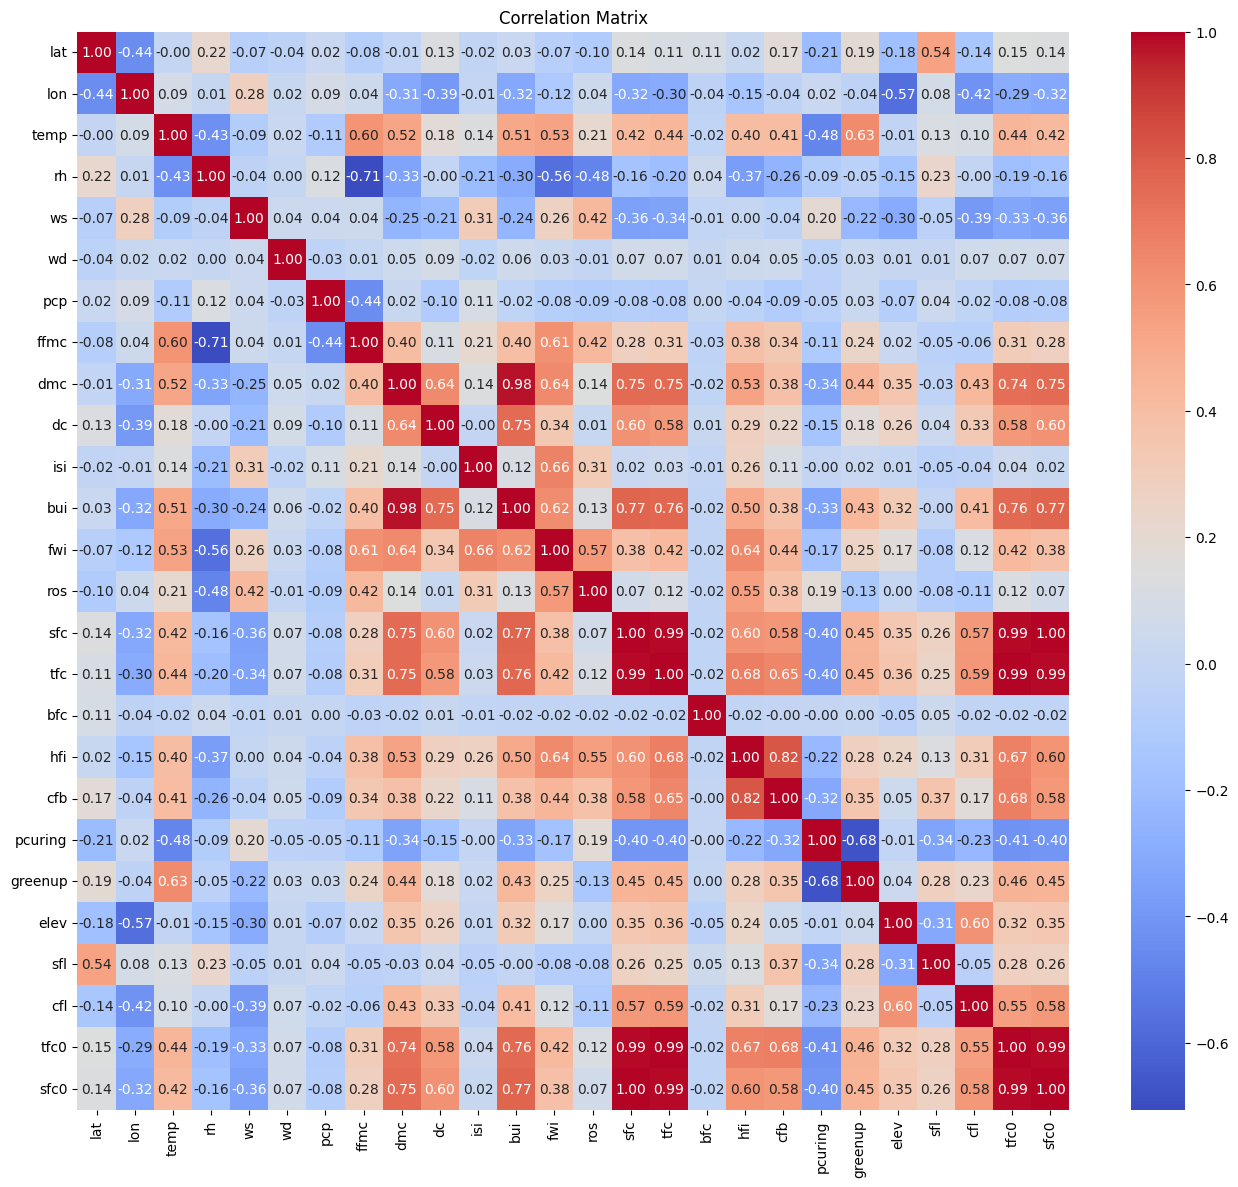

In [107]:
# Select only numeric columns for the correlation matrix
numeric_df = aggregated_gdf.select_dtypes(include=[np.number])

# Visualize the correlation matrix with updated figure size
plt.figure(figsize=(16, 14))  # Increased figure size for better visibility
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




High Positive Correlation:

ffmc and isi (0.64): This shows that as the Fine Fuel Moisture Code increases, the Initial Spread Index also tends to increase, which is expected as both are related to fire spread potential.

dmc and bui (0.98): The Duff Moisture Code and the Buildup Index are strongly correlated, indicating that as the moisture content of decomposed organic material increases, the overall potential fire fuel also increases.

tfc0 and sfc0 (0.99): Initial total fuel consumption and initial surface fuel consumption are almost perfectly correlated, which suggests that these two measurements of fuel consumption are very closely linked, possibly measuring similar aspects of fuel load.

ros and hfi (0.81): Rate of spread and head fire intensity have a strong positive correlation, indicating that higher spread rates are associated with more intense fires.
High Negative Correlation:

No pairs show extremely high negative correlation. 

Insight for Fire Behavior Analysis: The strong correlations between fire behavior indices like ffmc, isi, ros, and hfi suggest that these indices are good predictors of each other and can be critical in predicting fire spread and intensity.

In [108]:
# Create time-related features to extract meaningful time-based features from the date, which can help in understanding temporal patterns and trends in the data.
aggregated_gdf['year'] = aggregated_gdf['rep_date'].dt.year
aggregated_gdf['month'] = aggregated_gdf['rep_date'].dt.month
aggregated_gdf['day'] = aggregated_gdf['rep_date'].dt.day
aggregated_gdf['day_of_week'] = aggregated_gdf['rep_date'].dt.dayofweek
aggregated_gdf['day_of_year'] = aggregated_gdf['rep_date'].dt.dayofyear
aggregated_gdf['week_of_year'] = aggregated_gdf['rep_date'].dt.isocalendar().week

In [109]:
# Print to verify the addition of date-based features
print("First few rows after adding date-based features:")
print(aggregated_gdf.head())

First few rows after adding date-based features:
         locality   rep_date        lat         lon       temp    rh  \
0  100 Mile House 2021-01-09  51.627403 -121.285294  -0.926000  78.0   
1  100 Mile House 2021-07-01  51.643002 -121.137001  28.434000  41.0   
2  100 Mile House 2021-07-21  51.529999 -121.442001  19.333000  28.0   
3  100 Mile House 2021-07-25  51.541000 -121.434998  21.690001  33.0   
4  100 Mile House 2021-07-28  51.542999 -121.434998  26.897000  23.0   

          ws     wd    pcp       ffmc  ...      sfc0  postalCode  \
0  21.145000  328.0  1.504  36.189999  ...  0.070000         V0K   
1   8.228000  304.0  0.000  92.747002  ...  3.880000         V0K   
2  10.556000  213.0  0.000  93.273003  ...  4.340000         V0K   
3   7.647000   12.0  0.002  91.308998  ...  3.220000         V0K   
4   6.941333  177.0  0.000  93.584330  ...  3.933333         V0K   

                                     freeformAddress  \
0    5646 Horse Lake Road, 100 Mile House BC V0K 2E1 

In [110]:
# Generate lag features and rolling statistics
for lag in range(1, 4):
    aggregated_gdf[f'temp_lag_{lag}'] = aggregated_gdf.groupby('locality')['temp'].shift(lag)
    aggregated_gdf[f'rh_lag_{lag}'] = aggregated_gdf.groupby('locality')['rh'].shift(lag)

aggregated_gdf['temp_roll_mean_3'] = aggregated_gdf.groupby('locality')['temp'].transform(lambda x: x.rolling(window=3).mean())
aggregated_gdf['rh_roll_mean_3'] = aggregated_gdf.groupby('locality')['rh'].transform(lambda x: x.rolling(window=3).mean())
aggregated_gdf['temp_roll_mean_7'] = aggregated_gdf.groupby('locality')['temp'].transform(lambda x: x.rolling(window=7).mean())
aggregated_gdf['rh_roll_mean_7'] = aggregated_gdf.groupby('locality')['rh'].transform(lambda x: x.rolling(window=7).mean())

In [111]:
# Print to verify the addition of lag and rolling features
print("First few rows after adding lag and rolling features:")
print(aggregated_gdf.head())

First few rows after adding lag and rolling features:
         locality   rep_date        lat         lon       temp    rh  \
0  100 Mile House 2021-01-09  51.627403 -121.285294  -0.926000  78.0   
1  100 Mile House 2021-07-01  51.643002 -121.137001  28.434000  41.0   
2  100 Mile House 2021-07-21  51.529999 -121.442001  19.333000  28.0   
3  100 Mile House 2021-07-25  51.541000 -121.434998  21.690001  33.0   
4  100 Mile House 2021-07-28  51.542999 -121.434998  26.897000  23.0   

          ws     wd    pcp       ffmc  ...  temp_lag_1  rh_lag_1  temp_lag_2  \
0  21.145000  328.0  1.504  36.189999  ...         NaN       NaN         NaN   
1   8.228000  304.0  0.000  92.747002  ...   -0.926000      78.0         NaN   
2  10.556000  213.0  0.000  93.273003  ...   28.434000      41.0      -0.926   
3   7.647000   12.0  0.002  91.308998  ...   19.333000      28.0      28.434   
4   6.941333  177.0  0.000  93.584330  ...   21.690001      33.0      19.333   

   rh_lag_2  temp_lag_3 rh_lag_3

In [112]:
# Fill NaN values for lag and rolling features
lag_rolling_columns = [col for col in aggregated_gdf.columns if 'lag' in col or 'roll_mean' in col]

for col in lag_rolling_columns:
    aggregated_gdf[col].fillna(aggregated_gdf[col].mean(), inplace=True)

# Verify the NaN values are handled
print("First few rows after handling NaN values for lag and rolling features:")
print(aggregated_gdf.head())


First few rows after handling NaN values for lag and rolling features:
         locality   rep_date        lat         lon       temp    rh  \
0  100 Mile House 2021-01-09  51.627403 -121.285294  -0.926000  78.0   
1  100 Mile House 2021-07-01  51.643002 -121.137001  28.434000  41.0   
2  100 Mile House 2021-07-21  51.529999 -121.442001  19.333000  28.0   
3  100 Mile House 2021-07-25  51.541000 -121.434998  21.690001  33.0   
4  100 Mile House 2021-07-28  51.542999 -121.434998  26.897000  23.0   

          ws     wd    pcp       ffmc  ...  temp_lag_1   rh_lag_1  temp_lag_2  \
0  21.145000  328.0  1.504  36.189999  ...   18.510523  41.822817   18.854269   
1   8.228000  304.0  0.000  92.747002  ...   -0.926000  78.000000   18.854269   
2  10.556000  213.0  0.000  93.273003  ...   28.434000  41.000000   -0.926000   
3   7.647000   12.0  0.002  91.308998  ...   19.333000  28.000000   28.434000   
4   6.941333  177.0  0.000  93.584330  ...   21.690001  33.000000   19.333000   

    rh_la

/tmp/ipykernel_1694/314251785.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_gdf[col].fillna(aggregated_gdf[col].mean(), inplace=True)


In [113]:
# Handle non-numeric columns
categorical_columns = ['locality', 'fuel', 'ecozone', 'postalCode']
aggregated_gdf = pd.get_dummies(aggregated_gdf, columns=categorical_columns)

In [114]:
# Print to verify the encoding
print("Columns after encoding categorical features:")
print(aggregated_gdf.columns)

Columns after encoding categorical features:
Index(['rep_date', 'lat', 'lon', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc',
       'dmc',
       ...
       'postalCode_V9W', 'postalCode_V9X', 'postalCode_V9Y', 'postalCode_V9Z',
       'postalCode_X0C', 'postalCode_X0E', 'postalCode_X0G', 'postalCode_Y0A',
       'postalCode_Y0B', 'postalCode_Y1A'],
      dtype='object', length=2077)


In [115]:
# Fill missing values with the mean for numeric columns
for column in aggregated_gdf.select_dtypes(include=[float, int]).columns:
    aggregated_gdf[column].fillna(aggregated_gdf[column].mean(), inplace=True)

/tmp/ipykernel_1694/1383274449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_gdf[column].fillna(aggregated_gdf[column].mean(), inplace=True)


In [116]:
# Ensure 'columns_to_scale' only includes numeric columns
columns_to_scale = aggregated_gdf.select_dtypes(include=[np.number]).columns.tolist()


In [117]:
# Remove the target column 'cfb' if it's included
if 'cfb' in columns_to_scale:
    columns_to_scale.remove('cfb')

In [118]:
# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aggregated_gdf[columns_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=columns_to_scale)
scaled_df['cfb'] = aggregated_gdf['cfb'].values

In [119]:
# Display the scaled DataFrame
print("First few rows after scaling features:")
print(scaled_df.head())

First few rows after scaling features:
        lat       lon      temp        rh        ws        wd       pcp  \
0 -0.432110 -0.849369 -2.144340  2.282703  1.477529  1.434315  0.277917   
1 -0.428525 -0.838657  1.145351 -0.063922 -0.787897  1.175804 -0.213180   
2 -0.454500 -0.860689  0.125614 -0.888412 -0.379605  0.195618 -0.213180   
3 -0.451971 -0.860184  0.389708 -0.571301 -0.889795 -1.969408 -0.212527   
4 -0.451512 -0.860184  0.973135 -1.205524 -1.013557 -0.192148 -0.213180   

       ffmc       dmc        dc  ...  rh_lag_1  temp_lag_2  rh_lag_2  \
0 -4.439925 -1.317963 -1.562722  ...  0.000000    0.000000  0.000000   
1  0.713824  1.741887  0.521354  ...  2.552054    0.000000  0.000000   
2  0.761756  2.426862  1.259227  ... -0.058044   -2.640684  2.767918   
3  0.582786  1.844858  1.368925  ... -0.975106    1.278903 -0.059332   
4  0.790125  2.010029  1.517976  ... -0.622390    0.063911 -1.052690   

   temp_lag_3  rh_lag_3  temp_roll_mean_3  rh_roll_mean_3  temp_roll_mean_7  

In [120]:
scaled_df.columns

Index(['lat', 'lon', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc',
       'isi', 'bui', 'fwi', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'pcuring',
       'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'sfc0', 'year', 'month', 'day',
       'day_of_week', 'day_of_year', 'week_of_year', 'temp_lag_1', 'rh_lag_1',
       'temp_lag_2', 'rh_lag_2', 'temp_lag_3', 'rh_lag_3', 'temp_roll_mean_3',
       'rh_roll_mean_3', 'temp_roll_mean_7', 'rh_roll_mean_7', 'cfb'],
      dtype='object')

In [121]:
X = scaled_df.drop('cfb', axis=1)
y = scaled_df['cfb']

In [122]:
# Fit a random forest model to assess feature importances
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [123]:
# Get feature importances and sort them
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [124]:
# Select top N features, for example, top 20
top_features = feature_importances.head(20).index.tolist()

In [125]:
top_features

['hfi',
 'ros',
 'sfl',
 'cfl',
 'tfc0',
 'lon',
 'elev',
 'fwi',
 'lat',
 'dc',
 'tfc',
 'isi',
 'ffmc',
 'day_of_year',
 'pcuring',
 'bui',
 'bfc',
 'dmc',
 'sfc0',
 'wd']

In [126]:
final_features = [
    'year', 'month', 'day', 'day_of_week', 'week_of_year', 'lat', 'lon', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
    'fwi', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'sfl', 'cfl', 'tfc0', 'sfc0', 'pcuring', 'greenup', 'cfb'
]

In [127]:
# Check that all required columns are in the scaled_df
missing_columns = [col for col in final_features if col not in scaled_df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {missing_columns}")

In [128]:
final_df = scaled_df[final_features]

In [129]:
print(final_df.head())
print(final_df.describe())

       year     month       day  day_of_week  week_of_year       lat  \
0 -0.125524 -2.870375 -0.777265     1.039493     -3.066560 -0.432110   
1 -0.125524  0.117664 -1.718089    -0.008645     -0.164862 -0.428525   
2 -0.125524  0.117664  0.633972    -0.532714      0.183342 -0.454500   
3 -0.125524  0.117664  1.104384     1.563562      0.183342 -0.451971   
4 -0.125524  0.117664  1.457194    -0.532714      0.299410 -0.451512   

        lon      temp        rh        ws  ...       tfc       bfc       hfi  \
0 -0.849369 -2.144340  2.282703  1.477529  ... -1.148892 -0.062161 -0.654743   
1 -0.838657  1.145351 -0.063922 -0.787897  ...  1.460706 -0.061932  0.394671   
2 -0.860689  0.125614 -0.888412 -0.379605  ...  1.775776 -0.061707  1.223384   
3 -0.860184  0.389708 -0.571301 -0.889795  ...  1.008650 -0.061671 -0.324818   
4 -0.860184  0.973135 -1.205524 -1.013557  ...  1.559465 -0.061622  0.446105   

        sfl       cfl      tfc0      sfc0   pcuring   greenup   cfb  
0  0.037760 -0.4

In [130]:
final_df.columns

Index(['year', 'month', 'day', 'day_of_week', 'week_of_year', 'lat', 'lon',
       'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'sfl', 'cfl', 'tfc0', 'sfc0',
       'pcuring', 'greenup', 'cfb'],
      dtype='object')

In [131]:
print(final_df.isnull().sum())

year            0
month           0
day             0
day_of_week     0
week_of_year    0
lat             0
lon             0
temp            0
rh              0
ws              0
wd              0
pcp             0
ffmc            0
dmc             0
dc              0
isi             0
bui             0
fwi             0
ros             0
sfc             0
tfc             0
bfc             0
hfi             0
sfl             0
cfl             0
tfc0            0
sfc0            0
pcuring         0
greenup         0
cfb             0
dtype: int64


Data has been standardized, which is evident from the mean values close to 0 and standard deviations close to 1
The minimum and maximum values for each feature show a good spread
No missing values

In [132]:
from db_utils import insert_df_only_to_mongodb 

In [133]:
collection_name = 'wildfire_collection_feature_engineering_final'

In [134]:
# Insert the DataFrame into the new MongoDB collection
insert_df_only_to_mongodb(final_df, 'wildfire_collection_feature_engineering_final')

INFO:pymongo.client:You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb


Connection closed.


In [137]:
final_df.to_csv('final_engineered_data_tft.csv', index=False)
